相关性分析：纹饰 和 纹饰
Spearman相关性: 1.0
P值: 0.0
相关性显著


相关性分析：纹饰 和 类型
Spearman相关性: 0.1486339207310015
P值: 0.2228919031165546
相关性不显著


相关性分析：纹饰 和 颜色
Spearman相关性: 0.07298494322164024
P值: 0.5511895843411585
相关性不显著


相关性分析：纹饰 和 表面风化
Spearman相关性: 0.1098728241517508
P值: 0.368799793761282
相关性不显著


相关性分析：类型 和 类型
Spearman相关性: 1.0
P值: 0.0
相关性显著


相关性分析：类型 和 颜色
Spearman相关性: 0.07485828312262556
P值: 0.5409888447133452
相关性不显著


相关性分析：类型 和 表面风化
Spearman相关性: 0.4041011012511521
P值: 0.0005742216281791093
相关性显著


相关性分析：颜色 和 颜色
Spearman相关性: 1.0
P值: 0.0
相关性显著


相关性分析：颜色 和 表面风化
Spearman相关性: -0.06031126895316489
P值: 0.6225220091665868
相关性不显著


相关性分析：表面风化 和 表面风化
Spearman相关性: 1.0
P值: 0.0
相关性显著




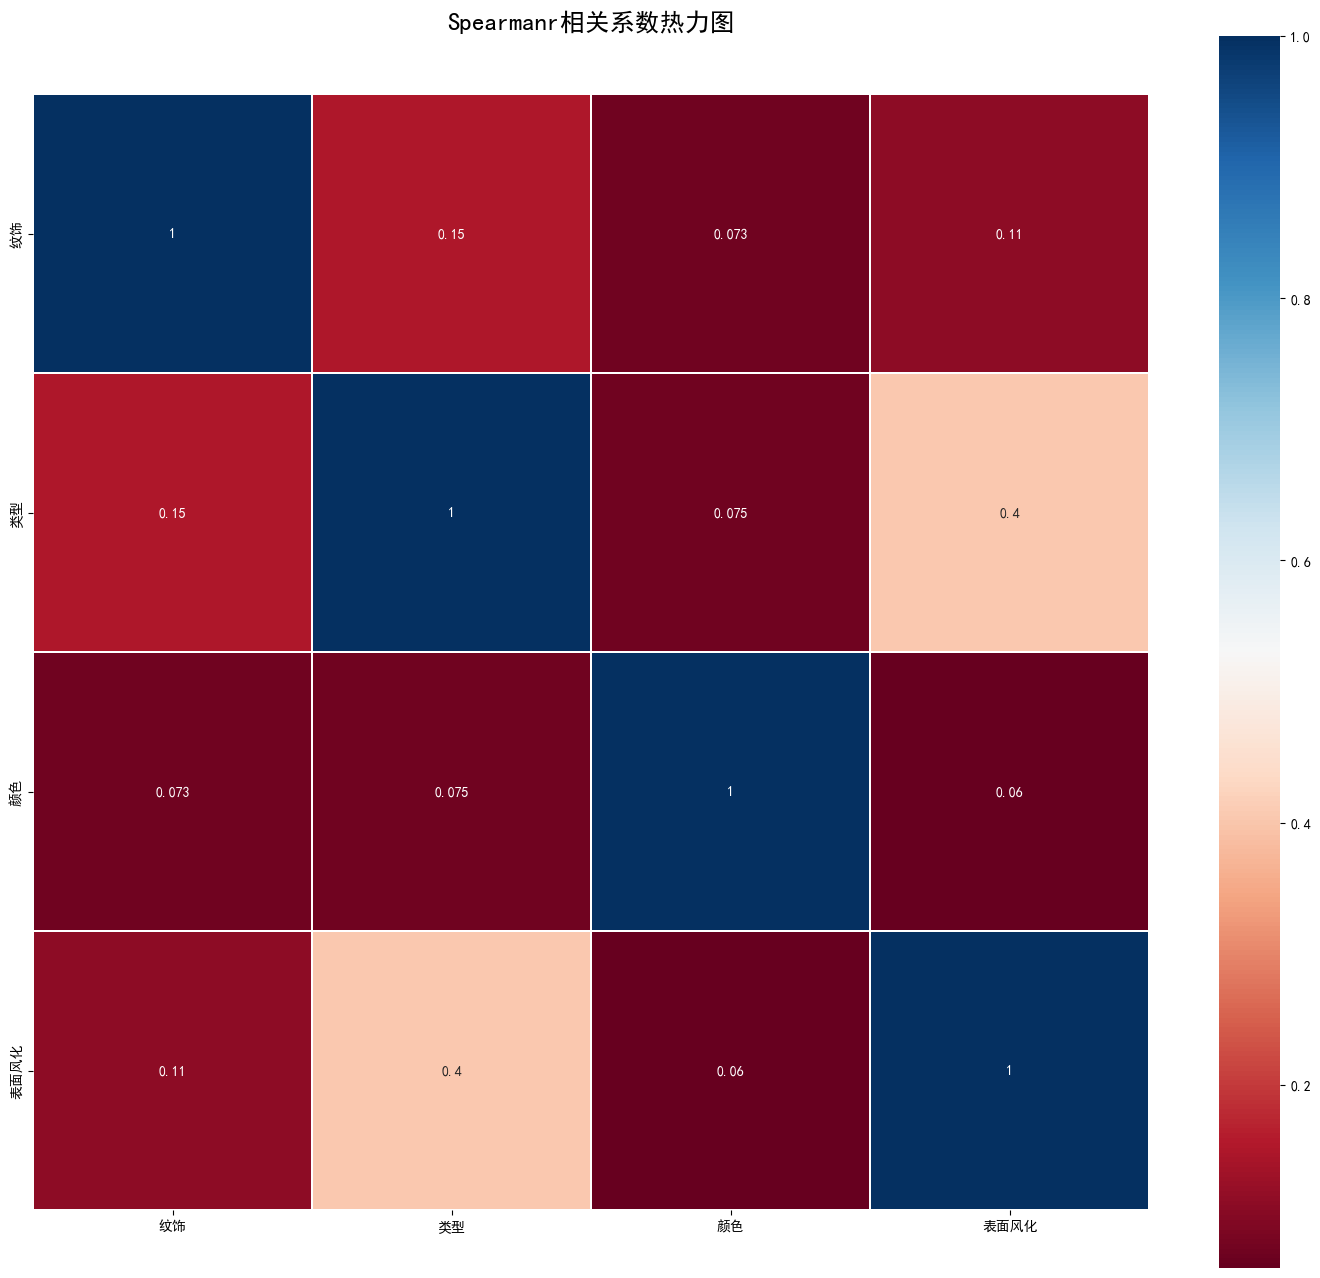

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.font_manager as fm

# 读取数据
df = pd.read_excel(r'./sheet12.xlsx', sheet_name=0)

# 获取四列数据的名称
column_names = ["纹饰", "类型", "颜色", "表面风化"]
G = np.zeros((len(column_names), len(column_names)))

# 进行两两之间的相关性分析
for i in range(len(column_names)):
    for j in range(i, len(column_names)):
        col1 = df[column_names[i]]
        col2 = df[column_names[j]]
        
        # 使用spearmanr函数计算Spearman相关性和p值
        correlation, p_value = spearmanr(col1, col2)
        G[i][j] = abs(correlation)
        G[j][i] = abs(correlation)
        
        # 打印结果
        print(f"相关性分析：{column_names[i]} 和 {column_names[j]}")
        print(f"Spearman相关性: {correlation}")
        print(f"P值: {p_value}")
        
        # 判断显著性
        alpha = 0.05  # 显著性水平
        if abs(p_value) < alpha:
            print("相关性显著")
        else:
            print("相关性不显著")
        print("\n")

def ShowGRAHeatMap(data, column_names):
    # 色彩集
    colormap = plt.cm.RdBu
    plt.figure(figsize=(18, 16))
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体或其他中文字体
    plt.title('Spearmanr相关系数热力图', y=1.05, size=18)
    sns.heatmap(data.astype(float), linewidths=0.1, vmax=1.0, square=True,\
               cmap=colormap, linecolor='white', annot=True, xticklabels=column_names, yticklabels=column_names)
    plt.show()

ShowGRAHeatMap(G, column_names)
